In [53]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time

# Import API key for open weather.
from config import weather_api_key

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats,lngs)

In [14]:
coordinates = list(lat_lngs)

In [26]:
# Create a lsit for holding the cities.
cities = []

# Identify the nearest city for each coordinate.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is uniqe add it to the list of cities.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
print(cities)

['iqaluit', 'atuona', 'punta arenas', 'guerrero negro', 'fairlie', 'lebu', 'tasiilaq', 'thompson', 'saint george', 'ushuaia', 'hermanus', 'nkhotakota', 'butaritari', 'coquimbo', 'jamestown', 'yellowknife', 'castro', 'kavieng', 'arraial do cabo', 'taolanaro', 'loreto', 'carnarvon', 'vaitupu', 'aksha', 'albany', 'iwanai', 'imeni poliny osipenko', 'kilindoni', 'jawhar', 'port alfred', 'winnemucca', 'neiafu', 'pakhtakoron', 'vila velha', 'cherskiy', 'sulphur', 'palmer', 'cape town', 'miri', 'acajutla', 'houma', 'tuktoyaktuk', 'muisne', 'avarua', 'belaya gora', 'zhanaozen', 'aklavik', 'saskylakh', 'hilo', 'rokytne', 'yangshe', 'attawapiskat', 'suhbaatar', 'illoqqortoormiut', 'yulara', 'haimen', 'norman wells', 'aktau', 'severo-kurilsk', 'qaanaaq', 'kirakira', 'kapaa', 'longyearbyen', 'keti bandar', 'guicheng', 'inhambane', 'rikitea', 'amderma', 'grindavik', 'inirida', 'faanui', 'roald', 'tura', 'barrow', 'tromso', 'san cristobal', 'port hardy', 'mozarlandia', 'hambantota', 'catamarca', 'geo

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=182243d71ab8e753b83d3ea47d6bfb8d


In [36]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Initiate counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers in the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | fairlie
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | nkhotakota
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | loreto
Processing Record 22 of Set 1 | carnarvon
Pr

Processing Record 39 of Set 4 | fabiansebestyen
Processing Record 40 of Set 4 | nome
Processing Record 41 of Set 4 | tommot
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | paracatu
Processing Record 44 of Set 4 | chama
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | mana
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | saint-paul
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | russell
Processing Record 1 of Set 5 | sirnak
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | gravdal
Processing Record 4 of Set 5 | davila
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | santa maria
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | new norfolk
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | aswan
Processing Record 11 of Set 5 | sao filipe
Processing Record 12 of Set 5 | rio galleg

Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | adrar
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | dondo
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 40 of Set 8 | vigrestad
Processing Record 41 of Set 8 | mudgee
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | morehead
Processing Record 45 of Set 8 | kikwit
Processing Record 46 of Set 8 | oda
Processing Record 47 of Set 8 | monrovia
Processing Record 48 of Set 8 | tarakan
Processing Record 49 of Set 8 | san quintin
Processing Record 50 of Set 8 | beira
Processing Record 1 of Set 9 | colesberg
Processing Record 2

Processing Record 19 of Set 12 | mangrol
Processing Record 20 of Set 12 | shelburne
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | oktyabrskiy
Processing Record 23 of Set 12 | hauterive
Processing Record 24 of Set 12 | yatou
Processing Record 25 of Set 12 | somoto
Processing Record 26 of Set 12 | pisco
Processing Record 27 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 28 of Set 12 | daru
Processing Record 29 of Set 12 | shache
Processing Record 30 of Set 12 | maneadero
Processing Record 31 of Set 12 | khandbari
Processing Record 32 of Set 12 | vodyane
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | shush
Processing Record 35 of Set 12 | nilagiri
Processing Record 36 of Set 12 | cururupu
Processing Record 37 of Set 12 | the valley
Processing Record 38 of Set 12 | colgong
Processing Record 39 of Set 12 | beruwala
Processing Record 40 of Set 12 | coari
Processing Record 41 of Set 12 | margate
Processing Record

In [40]:
print(city_data)

[{'City': 'Iqaluit', 'Lat': 63.75, 'Lng': -68.51, 'Max Temp': -0.4, 'Humidity': 70, 'Cloudiness': 75, 'Wind Speed': 18.34, 'Country': 'CA', 'Date': '2020-12-24 02:54:43'}, {'City': 'Atuona', 'Lat': -9.8, 'Lng': -139.03, 'Max Temp': 78.64, 'Humidity': 76, 'Cloudiness': 4, 'Wind Speed': 16.71, 'Country': 'PF', 'Date': '2020-12-24 02:58:22'}, {'City': 'Punta Arenas', 'Lat': -53.15, 'Lng': -70.92, 'Max Temp': 44.01, 'Humidity': 70, 'Cloudiness': 2, 'Wind Speed': 25.28, 'Country': 'CL', 'Date': '2020-12-24 02:58:22'}, {'City': 'Guerrero Negro', 'Lat': 27.98, 'Lng': -114.06, 'Max Temp': 62.08, 'Humidity': 65, 'Cloudiness': 100, 'Wind Speed': 5.95, 'Country': 'MX', 'Date': '2020-12-24 02:58:22'}, {'City': 'Fairlie', 'Lat': 55.76, 'Lng': -4.86, 'Max Temp': 35.01, 'Humidity': 79, 'Cloudiness': 46, 'Wind Speed': 9.17, 'Country': 'GB', 'Date': '2020-12-24 02:58:22'}, {'City': 'Lebu', 'Lat': -37.62, 'Lng': -73.65, 'Max Temp': 55.94, 'Humidity': 90, 'Cloudiness': 0, 'Wind Speed': 12.82, 'Country': 

In [43]:
# Convert the city data into a DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,-0.40,70,75,18.34,CA,2020-12-24 02:54:43
1,Atuona,-9.80,-139.03,78.64,76,4,16.71,PF,2020-12-24 02:58:22
2,Punta Arenas,-53.15,-70.92,44.01,70,2,25.28,CL,2020-12-24 02:58:22


In [46]:
ordered_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[ordered_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2020-12-24 02:54:43,63.75,-68.51,-0.40,70,75,18.34
1,Atuona,PF,2020-12-24 02:58:22,-9.80,-139.03,78.64,76,4,16.71
2,Punta Arenas,CL,2020-12-24 02:58:22,-53.15,-70.92,44.01,70,2,25.28
3,Guerrero Negro,MX,2020-12-24 02:58:22,27.98,-114.06,62.08,65,100,5.95
4,Fairlie,GB,2020-12-24 02:58:22,55.76,-4.86,35.01,79,46,9.17


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract data from DataFrame for scatter plots.
lats = city_data_df["Lat"]
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

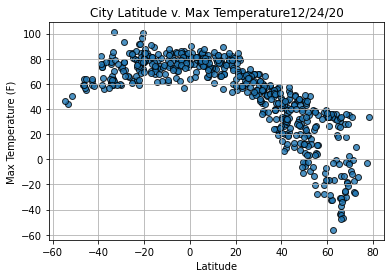

In [60]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

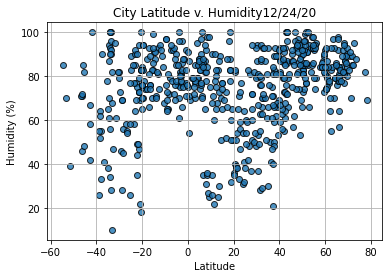

In [62]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Vloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudines")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()